In [378]:
import numpy as np
import math
import pandas as pd

In [379]:
def inverstKFinalEX(x,y,z):
  L = [30,20,20]

  d = L[0] - z

  Ag2 = math.acos(((x**2)+(y**2)-(L[1]**2)-(L[2]**2))/(2*L[1]*L[2]))
  Ag1 = math.asin(((y*(L[1]+L[2]*np.cos(Ag2)))-(x*(L[2]*np.sin(Ag2))))/(((x**2)+(y**2))))
    
  DAg1 = np.degrees(Ag1)
  DAg2 = np.degrees(Ag2)


  arAg = np.array([DAg1,DAg2])

  return arAg, d

In [380]:
def farword(num_case,dhP):
  trans_Matrix = np.zeros((num_case,4,4))
  result = np.identity((4))
  for i in range(num_case) :
        trans_Matrix[i][0][0] = np.cos(dhP[i][3]*3.1416/180);
        trans_Matrix[i][0][1] = -1 * np.sin(dhP[i][3]*3.1416/180);
        trans_Matrix[i][0][2] = 0;
        trans_Matrix[i][0][3] = dhP[i][1];

        trans_Matrix[i][1][0] = np.sin(dhP[i][3]*3.1416/180) * np.cos(dhP[i][0]*3.1416/180);
        trans_Matrix[i][1][1] = np.cos(dhP[i][3]*3.1416/180) * np.cos(dhP[i][0]*3.1416/180);
        trans_Matrix[i][1][2] = -1 * np.sin(dhP[i][0]*3.1416/180);
        trans_Matrix[i][1][3] = -1 * np.sin(dhP[i][0]*3.1416/180) * dhP[i][2];

        trans_Matrix[i][2][0] = np.sin(dhP[i][3]*3.1416/180) * np.sin(dhP[i][0]*3.1416/180);
        trans_Matrix[i][2][1] = np.cos(dhP[i][3]*3.1416/180) * np.sin(dhP[i][0]*3.1416/180);
        trans_Matrix[i][2][2] = np.cos(dhP[i][0]*3.1416/180);
        trans_Matrix[i][2][3] = np.cos(dhP[i][0]*3.1416/180) * dhP[i][2];

        trans_Matrix[i][3][0] = 0;
        trans_Matrix[i][3][1] = 0;
        trans_Matrix[i][3][2] = 0;
        trans_Matrix[i][3][3] = 1;

  for j in range(num_case):
    result = np.matmul(result,trans_Matrix[j])

  return result

In [381]:
Ag, d = inverstKFinalEX(20,14.142,10)

In [382]:
Ag

array([-16.97476731, 104.47779593])

In [383]:
d

20

In [384]:
L = np.array([30,20,20])
dh = np.array([[0,0,L[0],Ag[0]],
               [0,L[1],0,Ag[1]],
               [0,L[2],0,0],
               [180,0,d,0]])

out = farword(4,dh)
outT = pd.DataFrame(out)

In [385]:
outT 

,0,1,2,3
0,0.043563,0.999051,-7.339436e-06,19.999778
1,0.999051,-0.043563,3.200317e-07,14.141996
2,0.000000,-0.000007,-1.000000e+00,10.000000
3,0.000000,0.000000,0.000000e+00,1.000000


In [386]:
outP = []

In [387]:
for i in range(-90, 90, 10):
  for j in range(-90,90, 10):
    for k in range(-10,10, 2):
      dh = np.array([[0,0,L[0],i],
               [0,L[1],0,j],
               [0,L[2],0,0],
               [180,0,k,0]])
      
      out = farword(4,dh)
      outP.append(out) 
   
      

In [388]:
outSpace = np.array(outP)

In [389]:
outSpace.shape[0]

3240

In [390]:
outSpace = np.array(outP)
outSpace = outSpace.reshape(outSpace.shape[0],16)
outSpace = pd.DataFrame(outSpace)

In [391]:
outSpace

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.000000,0.000007,-5.396974e-11,-20.000073,0.000007,1.000000,-0.000007,-19.999780,0.0,-0.000007,-1.0,40.0,0.0,0.0,0.0,1.0
1,-1.000000,0.000007,-5.396974e-11,-20.000073,0.000007,1.000000,-0.000007,-19.999794,0.0,-0.000007,-1.0,38.0,0.0,0.0,0.0,1.0
2,-1.000000,0.000007,-5.396974e-11,-20.000073,0.000007,1.000000,-0.000007,-19.999809,0.0,-0.000007,-1.0,36.0,0.0,0.0,0.0,1.0
3,-1.000000,0.000007,-5.396974e-11,-20.000073,0.000007,1.000000,-0.000007,-19.999824,0.0,-0.000007,-1.0,34.0,0.0,0.0,0.0,1.0
4,-1.000000,0.000007,-5.396974e-11,-20.000073,0.000007,1.000000,-0.000007,-19.999838,0.0,-0.000007,-1.0,32.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,-0.939695,0.342014,-2.512575e-06,-15.320998,0.342014,0.939695,-0.000007,26.536447,0.0,-0.000007,-1.0,30.0,0.0,0.0,0.0,1.0
3236,-0.939695,0.342014,-2.512575e-06,-15.321003,0.342014,0.939695,-0.000007,26.536433,0.0,-0.000007,-1.0,28.0,0.0,0.0,0.0,1.0
3237,-0.939695,0.342014,-2.512575e-06,-15.321008,0.342014,0.939695,-0.000007,26.536419,0.0,-0.000007,-1.0,26.0,0.0,0.0,0.0,1.0
3238,-0.939695,0.342014,-2.512575e-06,-15.321013,0.342014,0.939695,-0.000007,26.536405,0.0,-0.000007,-1.0,24.0,0.0,0.0,0.0,1.0


In [392]:
osp = outSpace[[3,7,11]]

In [393]:
osp

,3,7,11
0,-20.000073,-19.999780,40.0
1,-20.000073,-19.999794,38.0
2,-20.000073,-19.999809,36.0
3,-20.000073,-19.999824,34.0
4,-20.000073,-19.999838,32.0
...,...,...,...
3235,-15.320998,26.536447,30.0
3236,-15.321003,26.536433,28.0
3237,-15.321008,26.536419,26.0
3238,-15.321013,26.536405,24.0


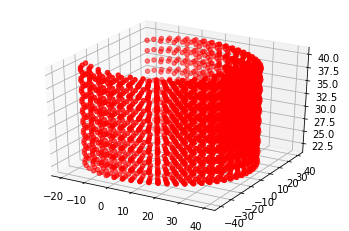

In [394]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = osp[3].values
y = osp[7].values
z = osp[11].values



ax.scatter(x, y, z, c='r', marker='o')

plt.show()

In [395]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [396]:
osp.to_csv("osp.csv",header=None,index=False)
from google.colab import files
files.download("osp.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>